In [1]:
import numpy as np


- Position of Node $X$
- Thickness at Node
- Director at Node $v$

In a pipe we take the distance to the center line. director is from this centerline. This can be commputed.

$$
X = X_0 + U
$$

In [2]:

def linear_shape_functions(xi, eta):
    """
    Compute linear shape functions for a 4-node quadrilateral element.

    :param xi: Natural coordinate in the xi-direction.
    :param eta: Natural coordinate in the eta-direction.
    :return: Array of shape functions.
    """
    N = np.zeros(4)
    N[0] = 0.25 * (1 - xi) * (1 - eta)  # N1
    N[1] = 0.25 * (1 + xi) * (1 - eta)  # N2
    N[2] = 0.25 * (1 + xi) * (1 + eta)  # N3
    N[3] = 0.25 * (1 - xi) * (1 + eta)  # N4
    return N

def linear_shape_function_derivatives(xi, eta):
    """
    Compute derivatives of linear shape functions for a 4-node quadrilateral element.

    :param xi: Natural coordinate in the xi-direction.
    :param eta: Natural coordinate in the eta-direction.
    :return: Matrix of shape function derivatives. Each row corresponds to a node, 
             the first column is dN/dxi, and the second column is dN/deta.
    """
    dN = np.zeros((4, 2))
    dN[0, :] = [-0.25 * (1 - eta), -0.25 * (1 - xi)]  # dN1/dxi, dN1/deta
    dN[1, :] = [0.25 * (1 - eta), -0.25 * (1 + xi)]   # dN2/dxi, dN2/deta
    dN[2, :] = [0.25 * (1 + eta), 0.25 * (1 + xi)]    # dN3/dxi, dN3/deta
    dN[3, :] = [-0.25 * (1 + eta), 0.25 * (1 - xi)]   # dN4/dxi, dN4/deta
    return dN

def compute_covariant_basis(node_coords, h, v, xi, eta, t):
    """
    Compute the covariant basis vectors at a given point in a 4-node quadrilateral element.

    :param node_coords: Array of node coordinates (4x3 matrix for 4 nodes and x, y, z coordinates).
    :param xi: Natural coordinate in the xi-direction.
    :param eta: Natural coordinate in the eta-direction.
    :return: Covariant basis vectors g1 and g2.
    """
    dN = linear_shape_function_derivatives(xi, eta)

    # Compute the covariant basis vectors
    g0 = np.dot(dN[:,0], node_coords) + 0.5 * t * np.dot(dN[:,0], h * v)
    g1 = np.dot(dN[:,1], node_coords) + 0.5 * t * np.dot(dN[:,1], h * v)
    gn = 0.5 * h * v

    J = np.stack([g0, g1, gn], axis=1)

    detJ = np.dot(gn, np.cross(g0, g1))
    
    return g0, g1, gn, J, detJ



def compute_contravariant_basis(g0, g1, gn):

    bottom = np.dot(g0,np.cross(g1,gn))

    gR = np.cross(g1,gn)/bottom
    gS = np.cross(gn,g0)/bottom
    gT = np.cross(g0,g1)/bottom

    return gR, gS, gT


def stiffness_tensor(E, nu, k = 5./6.):

    D = np.zeros((5,5))

    D[0][0] = E / (1 - nu**2)
    D[0][1] = nu*E / (1 - nu**2)
    D[1][1] = E / (1 - nu**2)
    D[1][0] = nu*E / (1 - nu**2)
    D[2][2] = E / (2*(1 + nu))
    D[3][3] = k* E / (2*(1 + nu))
    D[4][4] = k* E / (2*(1 + nu))

    return D






In [3]:



D = stiffness_tensor(1.0, 0.33, k = 5./6.)

assert np.abs(D[0][1] - 0.37032881) < 1.e-6, "Looks like stiffness tensor is wrong"

In [4]:
import pipefactory as pf

quad = pf.LinearQuad()

N = quad.N(-1.0, -1.0)

(quad.N(-1.0, -1.0) == [1.0, 0.0, 0.0, 0.0]).all()


True

In [5]:
import numpy as np

import pipefactory as pf

m = pf.BaseSquare(1.0,0.5).build()

list_of_nodes = m.elements[0].list_of_nodes


h = [1.0, 1.0, 1.0, 1.0]
Vn = np.array([[0.0, 0.0, 1.0],[0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0]])

param = {
    "materials" : {
        "E": 1.0,
        "nu": 0.3,
        "k": 5./6.
    }
}

e1 = pf.MITC4(m.elements[0].xi, list_of_nodes, m.elements[0].global_id, h, Vn, param, None, None)




In [6]:
e1.intpoints[0].g

array([[ 2.50000000e-01, -2.03979958e-13,  0.00000000e+00],
       [ 1.51838032e-13,  2.50000000e-01,  0.00000000e+00]])

$$
0.5t \sum_{i=1}^4 h_i N_{i,k} (-V_2^i \alpha_i + V^i_1 \beta_i)
$$

$$
0.5t h_i N_{i,k} -V_2^i \alpha_i
$$

In [7]:
import pipefactory as pf
import numpy as np

mesh = pf.BasePipeShell(70.0, 1.0, 0.1).build()


#d = mesh.to_numpy()

factory = pf.PipeTransform(mesh)

mesh = factory.uniform_stretch(2.0)

mesh.s[-1] == 2.0



True

In [8]:
Straight0 = {
    'Name': 'Straight0',
    'length': 10.0,
    'type': 'Straight',
}

Bend0 = {
    'Name': 'Bend0',
    'type': 'Bend',
    'param': {
        'radius': 20.0,
        'angle': 30.0
    }
}

Straight1 = {
    'Name': 'Straight1',
    'length': 10.0,
    'type': 'Straight',
}

section_list = [Straight0, Bend0, Straight1]

In [1]:
import pipefactory as pf

Straight0 = {
    'Name': 'Straight0',
    'length': 300.0,
    'type': 'Straight',
}

Bend0 = {
    'Name': 'Bend0',
    'type': 'Bend',
    'param': {
        'radius': 200.0,
        'angle': 20.0
    }
}

Straight1 = {
    'Name': 'Straight1',
    'length': 300.0,
    'type': 'Straight',
}

Bend1 = {
    'Name': 'Bend0',
    'type': 'Bend',
    'param': {
        'radius': 200.0,
        'angle': 30.0
    }
}

Straight2 = {
    'Name': 'Straight2',
    'length': 300.0,
    'type': 'Straight',
}



section_list = [Straight0, Bend0, Straight0]

mesh = pf.Pipe(70.0, 3.0, section_list, "quad", 10.0)

mesh.export()


43


In [2]:
mesh.map_to_section()


In [3]:
mesh.transform_ends()
mesh.transform_midline()
mesh.transform_mesh()

In [4]:
mesh.export()

In [10]:
import numpy as np

from pipefactory import rot_vec, get_orthogonal_inplane

angle = np.deg2rad(-30.)

rot_vec(np.array([1., 0., 0.]), angle, "z", angle_type="rad")

array([0.8660254, 0.5      , 0.       ])

In [11]:


ds = np.array([1.0, 0.0, 0.0])

x0 = np.array([0.0, 0.0, 0.0])


def get_coords_bend(x0, ds, radius, theta):
    dr = get_orthogonal_inplane(ds)
    if(angle < 0.0):
        return x0 - radius * (1.0 - np.cos(theta)) * dr - radius * np.sin(theta) * ds 
    else:
        return x0 + radius * (1.0 - np.cos(theta)) * dr + radius * np.sin(theta) * ds





#return x0 + radius * (1.0 - np.cos(theta)) * dr + radius * np.sin(theta) * ds

In [12]:
import meshio

import numpy as np

m = pipe.mesh

points = [] 
for i, n in enumerate(m.nodes):
    points.append(n.coords.tolist())





connectivity = []
for i, e in enumerate(m.elements):
    connectivity.append(e.list_of_nodes.tolist())
                        
cells = [
    ("quad", connectivity),
]

# Alternative with the same options
meshio.write_points_cells("foo.vtk", points, cells)

p = np.array(points)






NameError: name 'pipe' is not defined

In [ ]:
import numpy as np


import numpy as np

def make_midline(start: float, section_ends: list, element_size: float):
    """
    Create a NumPy array of equally spaced points within specified sections.

    Each section is defined by its start point (inclusive) and end point (inclusive),
    and the points within each section are spaced according to the specified element size.

    Parameters:
    start (float): The starting point of the first section.
    section_ends (list of float): A list of end points for each section. Each element in the list
                                  represents the end point of a section, starting from the given start point.
    element_size (float): The distance between each point in a section.

    Returns:
    np.array: A NumPy array of type np.float64 containing the midline points. Each point is spaced at 
              'element_size' distance, starting from 'start' and ending at the last point of the final 
              section in 'section_ends'.
    """

    midline = [start]
    for i, end in enumerate(section_ends):
        num_elements = int(np.ceil((end - start) / element_size))
        tmp = np.linspace(start, end , num_elements + 1).tolist()
        tmp.pop(0)
        midline += tmp
        start = end

    return np.array(midline, dtype=np.float64)



[100.         204.71975512 504.71975512]
10
11
30
[0.0, 10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0, 109.51997773815089, 119.03995547630177, 128.55993321445266, 138.07991095260354, 147.59988869075443, 157.1198664289053, 166.6398441670562, 176.15982190520708, 185.67979964335797, 195.19977738150885, 204.71975511965977, 214.71975511965977, 224.71975511965977, 234.71975511965977, 244.71975511965977, 254.71975511965977, 264.7197551196598, 274.7197551196598, 284.7197551196598, 294.7197551196598, 304.7197551196598, 314.7197551196598, 324.7197551196598, 334.7197551196598, 344.7197551196598, 354.7197551196598, 364.7197551196598, 374.7197551196598, 384.7197551196598, 394.7197551196598, 404.7197551196598, 414.7197551196598, 424.7197551196598, 434.7197551196598, 444.7197551196598, 454.7197551196598, 464.7197551196598, 474.7197551196598, 484.7197551196598, 494.7197551196598, 504.7197551196598]


In [ ]:
import numpy as np
import pytest
from your_module import make_midline  # Replace 'your_module' with the actual name of your module

def test_basic_functionality():
    # Test for basic functionality
    start = 0
    section_ends = [10, 20]
    element_size = 5
    expected = np.array([0, 5, 10, 15, 20], dtype=np.float64)
    assert np.array_equal(make_midline(start, section_ends, element_size), expected)

def test_single_section():
    # Test with a single section
    start = 2
    section_ends = [7]
    element_size = 1
    expected = np.array([2, 3, 4, 5, 6, 7], dtype=np.float64)
    assert np.array_equal(make_midline(start, section_ends, element_size), expected)

def test_no_section():
    # Test with no sections
    start = 5
    section_ends = []
    element_size = 2
    expected = np.array([5], dtype=np.float64)
    assert np.array_equal(make_midline(start, section_ends, element_size), expected)

def test_large_element_size():
    # Test with element size larger than the section size
    start = 0
    section_ends = [3]
    element_size = 5
    expected = np.array([0, 3], dtype=np.float64)
    assert np.array_equal(make_midline(start, section_ends, element_size), expected)

def test_element_size_zero():
    # Test with element size zero (should raise an error)
    start = 0
    section_ends = [5]
    element_size = 0
    with pytest.raises(ZeroDivisionError):
        make_midline(start, section_ends, element_size)


In [ ]:
from pipefactory import Node, Element

import numpy as np


def MakePipeMesh(
          element_size: float,
          radius: float,
          elem_type: str,
          midline: list):
    

    circumference = 2. * np.pi * radius

    elements_per_radius = int(np.ceil(circumference / element_size))

    theta = np.linspace(0.0, 2. * np.pi, elements_per_radius).tolist()
    theta.pop(-1)

    k = 0

    nr = len(theta)
    ns = len(midline)

    nnodes = nr * ns

    nodes = [ None ] * nnodes

    for i, s in enumerate(midline):
        for j, th in enumerate(theta):
            x = [np.array([s, radius * np.sin(th), radius * np.cos(th)])]
            v = [np.array([0.0, radius * np.sin(th), radius * np.cos(th)])]
            nodes[-1] = Node(x, k, v=v)
            nodes[-1].set_midline_indx(i)
            k += 1 # Increment Global Counter

    ie = 0
    elements = []

    if(elem_type == "quad"):
        for i in range(ns - 1):
            for j in range(nr):
                list_of_nodes = [j*nr + i, (j+1)*nr + i, (j+1)*nr+i+1, j*nr+i+1]
                elements.append(Element(list_of_nodes, "quad", ie))
                ie += 1

    elif(elem_type == "tri"):

        for i in range(ns - 1):
            for j in range(nr):

                    list_of_nodes = [j*nr + i, (j+1)*nr + i, (j+1)*nr+i+1]
                    elements.append(Element(list_of_nodes, "tri", ie))
                    ie += 1

                    list_of_nodes = [j*nr + i, (j+1)*nr+i+1, j*nr+i+1]
                    elements.append(Element(list_of_nodes, "tri", ie))
                    ie += 1

    else:
        
        raise Exception("We have currently only implemented quad and tri elements")
    
    return nodes, elements





In [ ]:
pipe.mesh.s

array([  0.      ,  45.883614,  91.767228, 137.650842, 183.534456,
       229.418071, 275.301685, 321.185299, 367.068913, 412.952527,
       458.836141, 504.719755])

In [3]:
import pipefactory as pf

Straight0 = {
    'Name': 'Straight0',
    'length': 300.0,
    'type': 'Straight',
}

Bend0 = {
    'Name': 'Bend0',
    'type': 'Bend',
    'param': {
        'radius': 200.0,
        'angle': 30.0
    }
}

section_list = [Straight0, Bend0, Straight0, Bend0, Straight0, Bend0, Straight0]

mesh = pf.Pipe(70.0, 3.0, section_list, ("quad", True), 30., 3)

mesh.export("foo.vtk")

[('hexahedron', [[0, 15, 16, 1, 795, 810, 811, 796], [1, 16, 17, 2, 796, 811, 812, 797], [2, 17, 18, 3, 797, 812, 813, 798], [3, 18, 19, 4, 798, 813, 814, 799], [4, 19, 20, 5, 799, 814, 815, 800], [5, 20, 21, 6, 800, 815, 816, 801], [6, 21, 22, 7, 801, 816, 817, 802], [7, 22, 23, 8, 802, 817, 818, 803], [8, 23, 24, 9, 803, 818, 819, 804], [9, 24, 25, 10, 804, 819, 820, 805], [10, 25, 26, 11, 805, 820, 821, 806], [11, 26, 27, 12, 806, 821, 822, 807], [12, 27, 28, 13, 807, 822, 823, 808], [13, 28, 29, 14, 808, 823, 824, 809], [14, 29, 15, 0, 809, 824, 810, 795], [15, 30, 31, 16, 810, 825, 826, 811], [16, 31, 32, 17, 811, 826, 827, 812], [17, 32, 33, 18, 812, 827, 828, 813], [18, 33, 34, 19, 813, 828, 829, 814], [19, 34, 35, 20, 814, 829, 830, 815], [20, 35, 36, 21, 815, 830, 831, 816], [21, 36, 37, 22, 816, 831, 832, 817], [22, 37, 38, 23, 817, 832, 833, 818], [23, 38, 39, 24, 818, 833, 834, 819], [24, 39, 40, 25, 819, 834, 835, 820], [25, 40, 41, 26, 820, 835, 836, 821], [26, 41, 42, 27

In [2]:
mesh.elements

[]

In [3]:
import numpy as np
np.max(np.array(X))

79

In [16]:
len(mesh.nodes)

80

In [14]:
mesh.elements[5].list_of_nodes

[5, 10, 11, 6, 25, 30, 31, 26]

In [36]:
class Edge():

    def __init__(self, id, nodes, elements, midpoint = None):

        self.id = id
        self.nodes = nodes
        self.midpoint = midpoint
        self.elements = elements

    def add_element(self, ie):
        self.elements.append(ie)

    



In [38]:

edges = []

cnt = 0

# All edges around the radius
for i in range(mesh.ns):
    for j in range(mesh.nr - 1):
        edges.append(Edge(cnt, [i * mesh.nr + j, i * mesh.nr + j + 1], []))
        cnt += 1
    edges.append(Edge(cnt, [(i + 1) * mesh.nr - 1, i * mesh.nr], []))
    cnt += 1

# All edges between rings
for i in range(mesh.ns-1):
    for j in range(mesh.nr):
        edges.append(Edge(cnt, [i * mesh.nr + j, (i + 1) * mesh.nr + j], []))
        cnt += 1




In [39]:
edges[0].elements

[]

In [42]:
ie = 0

# All edges between rings
for i in range(mesh.ns-1):
    for j in range(mesh.nr):

        if j < mesh.nr - 1:
            edge_list = [mesh.nr * (mesh.ns + i) + j, 
                        (i + 1) * mesh.nr + j,
                        mesh.nr * (mesh.ns + i) + j + 1,
                        i * mesh.nr + j]
        else:
            edge_list = [mesh.nr * (mesh.ns + i) + j, 
                        (i + 1) * mesh.nr + j,
                        mesh.nr * (mesh.ns + i),
                        i * mesh.nr + j]
        
        for tau_id in edge_list:
            edges[tau_id].add_element(ie)

        mesh.elements[ie].add_edges(edge_list)
            
        ie += 1 # increment elements
        


[0]


In [41]:
for ie, e in enumerate(mesh.elements): # For each element in the mesh

    for id in e.edge_list: # For each edge of element

        n = edges[id].get_midpoint()

        if n == None: # We need to make a new node at the midpoint

            # We need to do some work on how we construct the new node.

            node_ids = edges[id].nodes

            node0 = mesh.nodes[node_ids[0]]
            node1 = mesh.nodes[node_ids[1]]

            s = mesh.midline[node1.midline_indx] - mesh.midline[node0.midline_indx]

            global_id = len(mesh.nnodes)

            v_new = 0.5 * (node0.v + node1.v)

            if (s < 1e-6): # Then these two are in nodes are in the same plane.
                x_new = mesh.radius * (v_new - node0.v)
            else: # Then these two nodes are not in the same plane.
                section_idx = int(np.min([node0.section_indx, node1.section_indx]))
                section_type = mesh.section_list[section_idx]['type']

                if section_type.lower() == "straight":
                    x_new = 0.5 * (node0.coords + node1.coords)
                elif section_type.lower() == "bend":

                    WE just need to find the midpoint now and then it is x_midline + radius * v_new
                    We could do from last section_end.

            
            mesh.nnodes += 1 # Increment total nodes in mesh

            n = global_id # This is the node_id we have added.

            mesh.nodes.append(Node(x_new, global_id, v=v_new)) # Here you go?

            edges[id].set_midpoint(n)

        e.add_node(n) # appends the node to the list

    # We now need to update the element type       
    if e.elem_type == "quad4":
        e.elem_type = "quad8"  
    elif e.elem_type == "tri3":
        e.elem_type = "tri6"

    





[0]

In [5]:
import numpy as np
import pipefactory as pf

Straight0 = {
    'Name': 'Straight0',
    'length': 350.0,
    'type': 'Straight',
}

section_list = [Straight0]

mesh = pf.Pipe(outer_radius=70., 
               thickness = 3.0, 
               section_list=section_list, 
               elem_type=("hex", False), 
               element_size = 6.0, 
               elements_through_thickness = 3,
               element_around_circum=48)

mesh.degenerate_crack(pf.RadialCrack(s0=70.,phi0=0.,phi1=10.,crack_width=1.0,crack_depth=1.5,outer_radius=70.,thickness = 3.0))

In [9]:
mesh.nodes[3456].coords
mesh.nodes

array([71.85310734,  0.        , 68.        ])

In [6]:
mesh.export("foo.vtk")

In [1]:
import numpy as np
import pipefactory as pf

########## Pipe Parameter Class ###############

class PipeParam:
    def __init__(self,
                 outer_radius, 
                 thickness,
                 element_size,
                 element_around_circum, 
                 elements_through_thickness,
                 initial_direction = [1.0,0.0,0.0],
                 origin = [0.,0.,0.]):
        
        self.outer_radius = outer_radius
        self.thickness=thickness
        self.element_size=element_size
        self.element_around_circum=element_around_circum
        self.elements_through_thickness=elements_through_thickness

        self.section_list = [] # for pipefactory - still with bend_new and straight_new
        self.mesh_sections = [] # identical list but with renamed type
        self.current_dir = initial_direction
        self.origin = origin

    def add_straight(self, length):

        s_dict = {'length':length,
                  'dir': np.array(self.current_dir),
                  'type': 'Straight_new'}
        
        ss_dict = {'length':length,
                  'direction': self.current_dir,
                  'type': 'Straight'}

        self.section_list.append(s_dict)
        self.mesh_sections.append(ss_dict)

    def add_bend(self, radius, direction):

        direction = np.array(direction)/np.linalg.norm(np.array(direction))

        angle = np.arccos(np.dot(np.array(self.current_dir),direction))

        b_dict = {'type': 'Bend_new',
                  'param': {'dir1' : np.array(self.current_dir),
                            'dir2' : np.array(direction),
                            'radius': radius,
                            'angle' : angle}
                            }
        
        bb_dict = {'type': 'Bend',
                   'direction_begin' : self.current_dir,
                   'direction_end' : direction.tolist(),
                   'radius': radius,
                   'length' : radius*angle}

        self.section_list.append(b_dict)
        self.mesh_sections.append(bb_dict)

        self.current_dir = direction.tolist()

    def save_to_json(self, name, midline):

        self.pipe_parameters = {
            'Outer Radius': self.outer_radius,
            'Thickness': self.thickness,
            'Element Size': self.element_size,
            'Elements through Thickness': self.elements_through_thickness,
            'Elements around Circumference': self.element_around_circum,
            'Pipe Mesh Origin': self.origin
        }

        data_to_save = {
            'Pipe Parameters': self.pipe_parameters,
            'Mesh Sections': self.mesh_sections,
            'Defects': None,
            'Midline': midline
        }

        from json import dump

        with open(f'{name}.json', 'w') as file:
            dump(data_to_save, file, indent=4)

########### Input Parameters #############

name = "foo"

mesh_info = PipeParam(outer_radius = 0.0365, 
                      thickness = 0.01, 
                      element_size = 0.01,
                      element_around_circum = 48, 
                      elements_through_thickness = 3)

mesh_info.add_straight(0.2)
mesh_info.add_bend(0.5,[1.0,1.0,0.0])
mesh_info.add_straight(1.0)

In [6]:
mesh = pf.Pipe(outer_radius = mesh_info.outer_radius, 
               thickness = mesh_info.thickness, 
               section_list=mesh_info.section_list, 
               elem_type=("hex", False), 
               element_size = mesh_info.element_size,
               element_around_circum = mesh_info.element_around_circum, 
               elements_through_thickness = mesh_info.elements_through_thickness)
            #    mesh_refinement=pf.AxialRefinement(0.5,0.0025, pf.Ramp(0.1,0.3)))

# mesh.degenerate_crack(pf.RadialCrack(s0=0.1,phi0=67.6,phi1=112.4,crack_width=0.01,crack_depth=0.0015,outer_radius=0.0365,thickness = 0.01, smoothing_dist=0.03, el_thru_thick=3))

# mesh.export(f'{name}.xdmf')


In [7]:
mesh.add_elements(pf.Cuboid(0.5, 45., 60., 0.03, 0.005, mesh_info.outer_radius, mesh_info.thickness, mesh_info.elements_through_thickness ))
mesh.add_elements(pf.Cuboid(0.5, 75., 270., 0.03, 0.005, mesh_info.outer_radius, mesh_info.thickness, mesh_info.elements_through_thickness ))
mesh.export("foo.xdmf")

In [11]:
import numpy as np
theta = np.linspace(-np.pi, 3. * np.pi, 16+1)
mod_theta = theta % (2.*np.pi)
print(theta)

crack_mid_idx = np.argmin(np.abs(theta))
all_idx = np.nonzero(np.abs(theta)<1.5)[0].tolist()

print(mod_theta[crack_mid_idx], mod_theta[all_idx])

[-3.14159265 -2.35619449 -1.57079633 -0.78539816  0.          0.78539816
  1.57079633  2.35619449  3.14159265  3.92699082  4.71238898  5.49778714
  6.28318531  7.06858347  7.85398163  8.6393798   9.42477796]
0.0 [5.49778714 0.         0.78539816]


In [1]:
import pipefactory as pf

a = pf.AxialCrack(0.0, 6.2, 0.0,0.0,0.0,1.0)

a.outer_radius = 1.0
a.eac = 32

a.affected_phi()

(0.0,
 array([5.3014376 , 5.49778714, 5.69413668, 5.89048623, 6.08683577]),
 array([0.78539816, 0.58904862, 0.39269908, 0.19634954]))

In [32]:
import numpy as np

n=8

x = np.linspace(-np.pi,3.*np.pi, 2*n+1)
y = np.linspace(0.,2.*np.pi, n+1)

print(x)
print(y)

[-3.14159265 -2.35619449 -1.57079633 -0.78539816  0.          0.78539816
  1.57079633  2.35619449  3.14159265  3.92699082  4.71238898  5.49778714
  6.28318531  7.06858347  7.85398163  8.6393798   9.42477796]
[0.         0.78539816 1.57079633 2.35619449 3.14159265 3.92699082
 4.71238898 5.49778714 6.28318531]


In [37]:
th = np.concatenate([np.arange(n)*y[1]-2*np.pi,y, (np.arange(n)+1)*y[1]+2*np.pi])

print(th)

[-6.28318531 -5.49778714 -4.71238898 -3.92699082 -3.14159265 -2.35619449
 -1.57079633 -0.78539816  0.          0.78539816  1.57079633  2.35619449
  3.14159265  3.92699082  4.71238898  5.49778714  6.28318531  7.06858347
  7.85398163  8.6393798   9.42477796 10.21017612 10.99557429 11.78097245
 12.56637061]


<class 'pyvista.core.pointset.UnstructuredGrid'>


/home/maxim/.cache/pypoetry/virtualenvs/pipefactory-DrdaXKjJ-py3.10/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


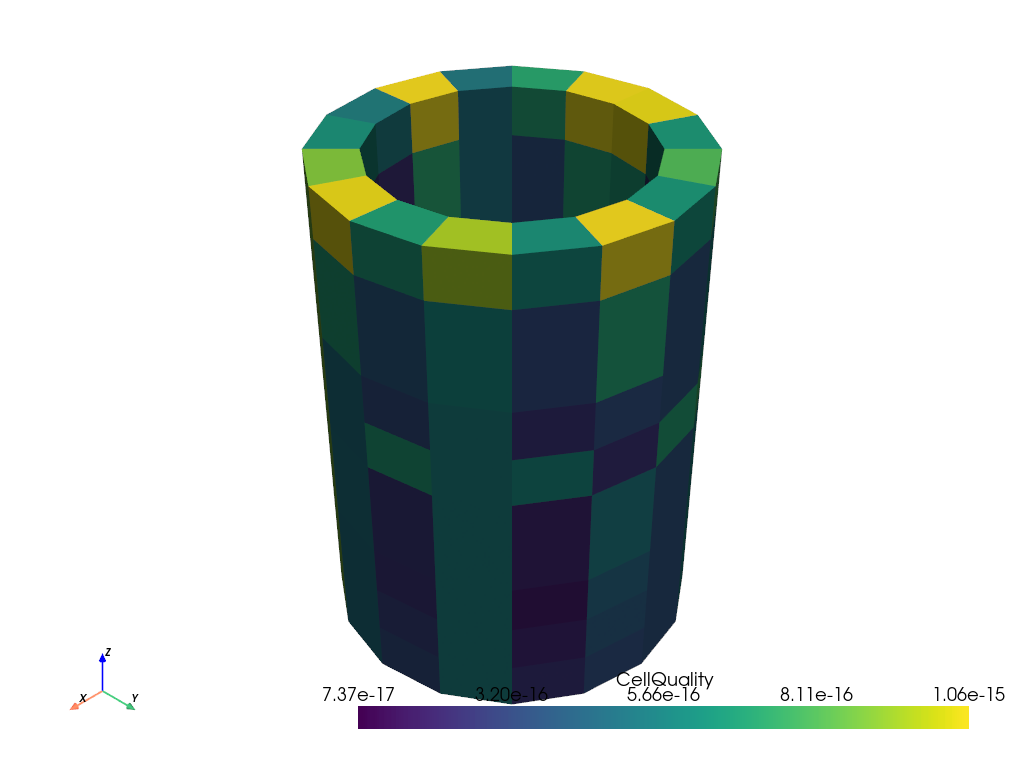

In [43]:
import pipefactory as pf
import meshio

name = "foo"

mesh_info = pf.PipeParam(outer_radius = 0.0365, 
                      thickness = 0.01, 
                      element_size = 0.01,
                      element_around_circum = 16, 
                      elements_through_thickness = 1)

mesh_info.add_straight(0.1)

mesh = pf.Pipe(outer_radius = mesh_info.outer_radius, 
               thickness = mesh_info.thickness, 
               section_list=mesh_info.section_list, 
               elem_type=("hex", False), 
               element_size = mesh_info.element_size,
               element_around_circum = mesh_info.element_around_circum, 
               elements_through_thickness = mesh_info.elements_through_thickness)

points, cells = mesh.get_points_cells()

pv_cells = [x for sublist in cells[0][1] for x in ([8]+sublist)]
import pyvista as pv

grid = pv.UnstructuredGrid(pv_cells,[pv.CellType.HEXAHEDRON]*len(cells[0][1]), points)

qual = grid.compute_cell_quality(quality_measure="skew")
print(type(qual))

qual.plot()

# pl = pv.Plotter()
# pl.add_mesh(grid)
# pl.show()


In [47]:
type(qual.active_scalars)

pyvista.core.pyvista_ndarray.pyvista_ndarray

In [41]:
dir(qual)

['ALL_PIECES_EXTENT',
 'AddObserver',
 'AddReferenceToCell',
 'Allocate',
 'AllocateCellGhostArray',
 'AllocateEstimate',
 'AllocateExact',
 'AllocatePointGhostArray',
 'AttributeTypes',
 'BOUNDING_BOX',
 'BreakOnError',
 'BuildCellLocator',
 'BuildLinks',
 'BuildLocator',
 'BuildPointLocator',
 'CELL',
 'CELL_DATA_FIELD',
 'CELL_DATA_VECTOR',
 'CheckAttributes',
 'ComputeBounds',
 'ConvertFaceStreamPointIds',
 'CopyAttributes',
 'CopyInformationFromPipeline',
 'CopyInformationToPipeline',
 'CopyStructure',
 'Crop',
 'DATA_EXTENT',
 'DATA_EXTENT_TYPE',
 'DATA_NUMBER_OF_GHOST_LEVELS',
 'DATA_NUMBER_OF_PIECES',
 'DATA_OBJECT',
 'DATA_OBJECT_FIELD',
 'DATA_PIECE_NUMBER',
 'DATA_TIME_STEP',
 'DATA_TYPE_NAME',
 'DIRECTION',
 'DataHasBeenGenerated',
 'DebugOff',
 'DebugOn',
 'DecomposeAPolyhedronCell',
 'DeepCopy',
 'EDGE',
 'EDGE_DATA_VECTOR',
 'EditableOff',
 'EditableOn',
 'ExtendedNew',
 'FIELD',
 'FIELD_ACTIVE_ATTRIBUTE',
 'FIELD_ARRAY_TYPE',
 'FIELD_ASSOCIATION',
 'FIELD_ASSOCIATION_CE